In [10]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
result = pd.read_csv('https://raw.githubusercontent.com/adautofbn/ri_lab_01/master/output/results.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas)

In [0]:
all_words = []
filtered_words = []

tknz = RegexpTokenizer(r'([A-Za-zÁáÉéÍíÓóÚúÃãÕõÇçÂâÊê]{3,27})')
stopwords = nltk.corpus.stopwords.words('portuguese')

for text in result.text:
   words = [word for word in tknz.tokenize(text.lower())
           if len(word) >= 3 and not bool(re.search(r'\d', word))]
   all_words.extend(words)

filtered_words = [word for word in all_words if word not in stopwords]

In [12]:
print("Sem filtragem de stopwords:", len(all_words))
print("Com filtragem de stopwords:", len(filtered_words))

Sem filtragem de stopwords: 17768
Com filtragem de stopwords: 13949


A estratégia escolhida foi a de tokenizar o csv adquirido no lab 01, utilizando o tokenizador provido pela biblioteca nltk a partir de um regex que suporta palavras da líingua portuguesa. Também tratamos tudo como letras minúsculas e retiramos palavras sem muito significado que estão contidas dentro do conjunto chamada "stopwords" também provido pelo nltk.

### 2. Refaça a questão 2 do Laboratório anterior usando os tokens produzidos 

In [0]:
total_word_occurrences = len(filtered_words)
word_frequency = {}
word_frequency = Counter(filtered_words)

In [14]:
top_words = word_frequency.most_common(50)

top_50_table = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

top_50_table['Word'] = [word[0] for word in top_words]
top_50_table['Frequency'] = [word[1] for word in top_words]
top_50_table['r'] = [rank+1 for rank in range(0, len(top_words))]
top_50_table['Pr(%)'] = [round((word[1] / total_word_occurrences)*100, 2) for word in top_words]
top_50_table['r.Pr'] = round((top_50_table['Pr(%)']/100)*top_50_table['r'], 3)

table = top_50_table.set_index('r')
table

,Word,Frequency,Pr(%),r.Pr
r,,,,
1,presidente,113,0.81,0.008
2,brasil,94,0.67,0.013
3,bolsonaro,91,0.65,0.020
4,sobre,84,0.60,0.024
5,disse,68,0.49,0.024
6,governo,58,0.42,0.025
7,ministro,57,0.41,0.029
8,país,47,0.34,0.027
9,acordo,47,0.34,0.031


### 3. Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos.

In [15]:
stemmed_words = []
stemmer = nltk.stem.SnowballStemmer('portuguese')

stemmed_words = [stemmer.stem(word) for word in filtered_words]

set_stem = sorted(set(stemmed_words))
set_words = sorted(set(all_words))

print("Conjunto de palavras sem Stemming:",len(set_words))
print("Conjunto de palavras com Stemming:",len(set_stem))

print(set_stem)
print(set_words)

Conjunto de palavras sem Stemming: 5105
Conjunto de palavras com Stemming: 3265
['aba', 'abacax', 'abaix', 'abandon', 'abastec', 'abat', 'abc', 'abert', 'abertur', 'abord', 'abrangent', 'abre', 'abreu', 'abril', 'abrind', 'abrir', 'abriu', 'absolut', 'abus', 'acab', 'acas', 'acat', 'aceler', 'acentu', 'aces', 'acha', 'acham', 'achand', 'acho', 'acim', 'acion', 'acolh', 'acomet', 'acompanh', 'acontec', 'acord', 'acredit', 'acrescent', 'act', 'acumul', 'acus', 'adam', 'adcs', 'ader', 'adesã', 'adi', 'adiament', 'adicional', 'adit', 'administr', 'admir', 'admit', 'adnet', 'adolf', 'ador', 'adot', 'adp', 'adquir', 'adub', 'adversár', 'advert', 'advocac', 'advog', 'aeronáut', 'afast', 'afeganistã', 'affffff', 'afili', 'afin', 'afirm', 'afp', 'african', 'afro', 'afront', 'afund', 'age', 'agend', 'agent', 'agiliz', 'agim', 'agir', 'agit', 'agiu', 'agor', 'agr', 'agradec', 'agressã', 'agricultor', 'agricultur', 'agroecolog', 'agroecológ', 'agronegóci', 'agropecuár', 'agropecuári', 'agrotóx', '

*   Falsos positivos: 
*   Falsos negativos: jair/jairbolsonar, viag/viagens, terc/terceir, super/superior, senh/senhor, roupag/roupagens, regul/regulament, passag/passageir, neoliber/neoliberal, documento/documentos.

Para consultas, essas anomalias irão provocar resultados que não eram esperados para algumas consultas que apresentarem palavras chaves que se encaixam nesses falsos positivos e falsos negativos. Como exemplo, ao consultar a palavra "x" você pode acabar encontrando resultados que apresentam a palavra "y".

### 4. Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais?

In [0]:
total_stemmed_word_occurrences = len(stemmed_words)
stemmed_word_frequency = {}
stemmed_word_frequency = Counter(stemmed_words)

top_stemmed_words = stemmed_word_frequency.most_common(50)

top_stemmed_50_table = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

top_stemmed_50_table['Word'] = [word[0] for word in top_stemmed_words]
top_stemmed_50_table['Frequency'] = [word[1] for word in top_stemmed_words]
top_stemmed_50_table['r'] = [rank+1 for rank in range(0, len(top_stemmed_words))]
top_stemmed_50_table['Pr(%)'] = [round((word[1] / total_stemmed_word_occurrences)*100, 2) for word in top_stemmed_words]
top_stemmed_50_table['r.Pr'] = round((top_stemmed_50_table['Pr(%)']/100)*top_stemmed_50_table['r'], 3)

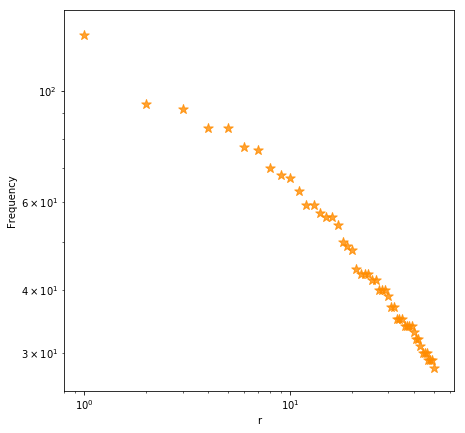

In [17]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", top_stemmed_50_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')

Para este gráfico, comparando-o com o mesmo exemplo do laboratório anterior, é possível perceber uma maior linearidade na disposição dos tokens no gráfico, devido a maior concentração da informação, já que nesse caso há o agrupamento das palavras a partir dos seus radicais.

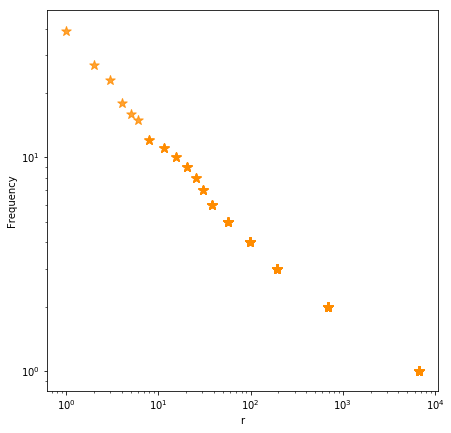

In [18]:
bigrams = []
bigrams = nltk.bigrams(stemmed_words)
bigrams_freq = nltk.FreqDist(bigrams)
bigrams_table = pd.DataFrame(bigrams_freq.most_common(), columns=['word', 'Frequency'])
bigrams_table['r'] = bigrams_table['Frequency'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", bigrams_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')

Neste caso, comparando-o com o mesmo exemplo do laboratório anterior, não é possível perceber uma diferença significativa na disposição dos tokens no gráfico.